In [48]:
# Code for Cubic Spline problem

def thomas_algorithm(a, b, c, d):
    """
    Solves the Tridiagonal Linear System
          --             -- -- --   -- --
          |b_1 c_1        | |f_1|   |d_1|
          |a_2 b_2 c_2    | | . |   | . |
          |    a_3 . . .  | | . | = | . |
          |               | |   |   |   |
          |               | |   |   |   |
          |       a_n b_n | |f_n|   |d_n|
          --             -- -- --   -- --
    """
    assert len(a) == len(b) == len(c) == len(d)
    N = len(c)
    c_ = [None for i in range(N)]
    d_ = [None for i in range(N)]
    f = [None for i in range(N)]
    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, N):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    f[N-1] = d_[N-1]
    for i in range(N-2, -1, -1):
        f[i] = d_[i] - c_[i]*f[i+1]

    return f


def cubic_spline(X, Y, M_0, M_n):
    # Assuming constant spacing
    h = X[1] - X[0]
    n = len(X)
    A = [1 for i in range(n-2)]
    B = [4 for i in range(n-2)]
    C = [1 for i in range(n-2)]
    D = [(6/h**2)*(Y[i-1] - 2*Y[i] + Y[i+1]) for i in range(1, n-1)]

    M = [M_0] + thomas_algorithm(A, B, C, D) + [M_n]

    X_ = []
    Y_ = []
    for k in range(n-1):
        dx = h/10
        for i in range(10):
            x = X[k] + i*dx
            y = (M[k]/(6*h))*((X[k+1] - x)**3 - h*(X[k+1] - x)) + (M[k+1]/(6*h))*((x - X[k])**3 - h*(x - X[k]))+ \
                    Y[k]*(X[k+1] - x)/h + Y[k+1]*(x - X[k])/h
            X_.append(x)
            Y_.append(y)

    return (X_, Y_)

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(0, 20, 10)
Y = np.sin(X)
X_, Y_ = cubic_spline(X, Y, 0, 0)

[0, 20, -1, 1]

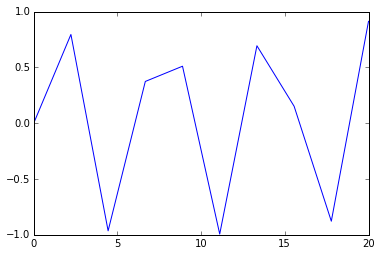

In [46]:
plt.plot(X, Y); plt.axis([0, 20, -1, 1])

[0, 20, -1, 1]

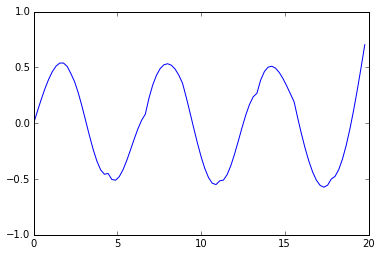

In [47]:
plt.plot(X_, Y_); plt.axis([0, 20, -1, 1])